In [2]:
#Solution: The objective is to determine whether CO2 emission from cars depends on fuel type 
# or manufacturer or both. 
# Descriptive Analysis (EDA) on Car Dat

In [4]:
#Step 1: Import important packages into Jupyter Notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Step 2: Read the dataset into Jupyter Notebook using read_csv
aovData = pd.read_csv('AOVData.csv')

In [7]:
aovData.shape

(510, 4)

In [9]:
aovData.head()

,Car_ID,manufacturer,fuel_type,co_emissions
0,1,Audi,Petrol,441.55
1,2,BMW,E85,376.47
2,3,BMW,E85,414.12
3,4,BMW,E85,351.41
4,5,Volvo,E85,284.59


In [10]:
# Note that “co_emissions” is the response 𝑌 and “fuel_type” and “manufacturer” are two factors at multiple levels

In [12]:
#Step 3: Summary of response: Carbon emission
aovData['co_emissions'].describe().transpose()

count    510.000000
mean     358.456882
std       66.912999
min      162.070000
25%      312.630000
50%      356.190000
75%      410.645000
max      544.560000
Name: co_emissions, dtype: float64

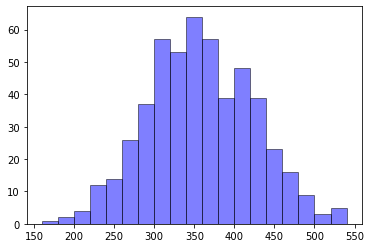

In [13]:
bin_edges = np.arange(160, 560, 20)
plt.hist(aovData.co_emissions,
 bins=bin_edges,
 density=False,
 histtype='bar',
 color='b',
 edgecolor='k',
 alpha=0.5);

In [14]:
# The minimum value of carbon emission is 162.1 and maximum is 544.6 and the mean value is 
# 358.5. Using figure (7) and figure (8), the pattern of carbon emission can be visualized.

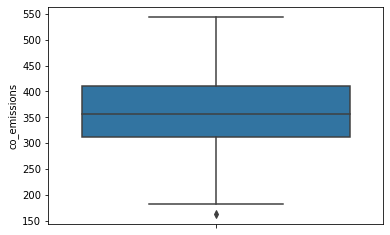

In [15]:
sns.boxplot(aovData['co_emissions'] , orient = 'v')
plt.show()

In [16]:
# Frequency counts and mean of carbon emission at different levels of the factors are shown below. 

In [18]:
# #Factor 1: fuel_type
aovData['fuel_type'].value_counts()

Petrol    179
LPG       170
E85       161
Name: fuel_type, dtype: int64

In [19]:
aovData.groupby("fuel_type")["co_emissions"].mean()

fuel_type
E85       338.124534
LPG       363.744412
Petrol    371.722961
Name: co_emissions, dtype: float64

In [20]:
#Factor 2: manufacturer
aovData['manufacturer'].value_counts()

Audi     142
Ford     132
Volvo    123
BMW      113
Name: manufacturer, dtype: int64

In [21]:
aovData.groupby("manufacturer")["co_emissions"].mean()

manufacturer
Audi     349.727254
BMW      377.538761
Ford     365.078561
Volvo    343.898293
Name: co_emissions, dtype: float64

In [22]:
# Problem 1: Whether there is any dependency on 𝑌 of 𝑋1: Fuel Type
# We need to test the hypothesis that the use of three different fuel types does not impact carbon emission.
# Formally 𝐻0: 𝜇1 = 𝜇2 = 𝜇3 against 𝐻𝑎: At least one carbon emission level is different from the rest.
# Before one-way ANOVA procedure is applied to the data, visual comparison is recommended. 
# Moreover, the normality and equality of variance assumptions need to be checked.

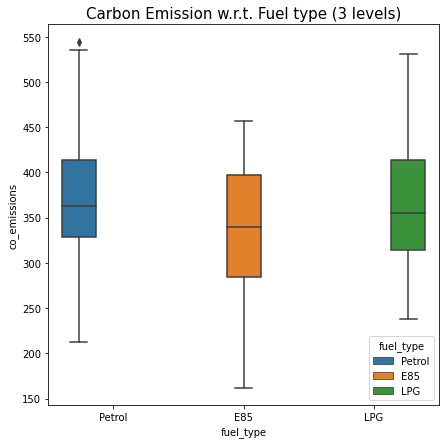

In [24]:
a4_dims = (7,7)
fig, ax = plt.subplots(figsize=a4_dims)
a = sns.boxplot(x= "fuel_type", y = 'co_emissions' , data = aovData, hue 
= 'fuel_type')
a.set_title("Carbon Emission w.r.t. Fuel type (3 levels)",fontsize=15)
plt.show()

In [25]:
# For testing of normality, Shapiro-Wilk’s test is applied to the response. 
# 𝐻0: Carbon emission follows a normal distribution against 𝐻𝑎: Carbon emission does not follow a normal distribution

In [26]:
#Aussmption 1: Normality
from scipy import stats
w, p_value = stats.shapiro(aovData['co_emissions'])
print("W = {}".format(w), "p_value = {}".format(p_value))

W = 0.9970714449882507 p_value = 0.49723097681999207


In [28]:
# Since p-value of the test is very large, we fail to reject the null hypothesis that the response
# follows the normal distribution.

In [29]:
# Next, we need to test the assumption that at all three levels of the factor fuel_type, population 
# variance is equal. In other words, the homogeneity of variance assumption is satisfied. We may 
# formulate the problem as:
# 𝐻0: 𝜎1 = 𝜎2 = 𝜎3 against 𝐻𝑎: At least one variance is different from the rest.

In [30]:
#Aussmption 2: Homogeneity of Variance
statistic, p_value = stats.levene(
 aovData['co_emissions'][aovData['fuel_type']=="Petrol"],
 aovData['co_emissions'][aovData['fuel_type']=="E85"],
 aovData['co_emissions'][aovData['fuel_type']=="LPG"])
print("statistic = {}".format(statistic), "p_value = {}".format(p_value))

statistic = 1.6432552897712633 p_value = 0.19437768490117


In [31]:
# Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.
# Once the two assumptions of one-way ANOVA are satisfied, we can now compare the population means. 

In [40]:
#Apply one-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols # For n-way ANOVA
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
mod = ols('co_emissions ~ fuel_type', data = aovData).fit()
aov_tbl = sm.stats.anova_lm(mod, type = 1)
print(aov_tbl)

              df        sum_sq       mean_sq          F    PR(>F)
fuel_type    2.0  1.028130e+05  51406.481215  11.976652  0.000008
Residual   507.0  2.176158e+06   4292.224647        NaN       NaN


In [42]:
### Let us consider the summary output known as ANOVA Table.
### For the given problem sum of squares due to the factor fuel_type (SSB) is 102813 and the sum 
### of squares due to error (SSW) is 2176158. The total sum of squares (SST) for the data is 
### (102813+2176158=2278971). Since the factor has 3 levels, DF corresponding to fuel_type is 
### 3 – 1 = 2. Total DF is 510 – 1 = 509. Hence DF due to error is 509 – 2 = 507. Mean sum of 
### squares is obtained by dividing the sums of squares by corresponding DF. The value of the Fstatistic is approximately 12 and the p-value is highly significant.
### Based on the ANOVA test we, therefore, reject the null hypothesis that the three population 
### means are identical. At least for one fuel-type mean carbon emission is different from the rest. 
### Residuals are defined as the difference between the observed values and the expected values. 
### Detail discussion on residuals will be taken up along with Simple Linear Regression. The 
### following two graphs are introduced to check the distribution of the residuals. Fig 10 indicates 16
### Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.
### that the mean carbon emission of two groups are close but the other group means stands out. It 
### also supports the homoscedasticity of variances. Fig 11 indicates that the normality assumption 
### holds.

Text(0, 0.5, 'Residuals')

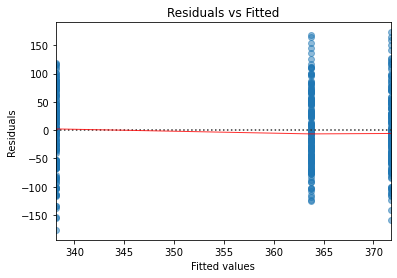

In [48]:
# model values
model_fitted_y = mod.fittedvalues
# model residuals
model_residuals = mod.resid
# normalized residuals
model_norm_residuals = mod.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = mod.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = mod.get_influence().cooks_distance[0]
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'co_emissions', data=aovData,
 lowess=True,
 scatter_kws={'alpha': 0.5},
 line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

In [49]:
QQ = ProbPlot(model_norm_residuals)

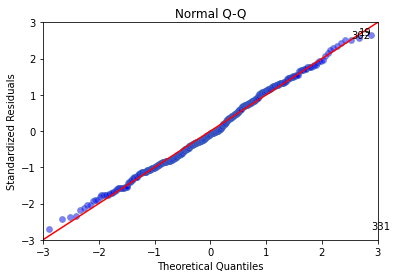

In [50]:
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
 plot_lm_2.axes[0].annotate(i,xy=(np.flip(QQ.theoretical_quantiles, 0
)[r],model_norm_residuals[i])) 

In [52]:
### Note that once the null hypothesis of equality of means is rejected, the next natural question is 
### to find out which mean(s) is different from the rest. Before we answer that question, let us first 
### check whether carbon emission is dependent on the manufacturer.
### Problem 2: Whether there is any dependency on 𝑌 of 𝑋2: Manufacturer
### We need to test the hypothesis that carbon emission is the same for all car manufacturer. 
### Formally,
### 𝐻0: 𝜇1 = 𝜇2 = 𝜇3 = 𝜇4 against 𝐻𝑎: At least for one manufacturer emission level is different 
### from the rest.
### As in the previous problem, visual comparison of group means is recommended.

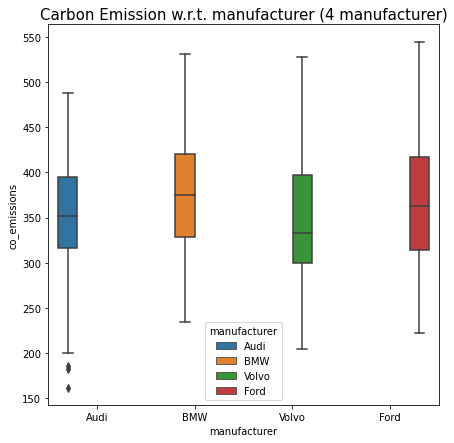

In [55]:
a4_dims = (7,7)
fig, ax = plt.subplots(figsize=a4_dims)
a = sns.boxplot(x= "manufacturer", y = 'co_emissions' , data = aovData, 
hue = 'manufacturer')
a.set_title("Carbon Emission w.r.t. manufacturer (4 manufacturer)",fontsize=15)
plt.show()

In [56]:
# Assumption 1 has already been tested for this data.
# Equality of variance assumption needs to be checked for this factor.
# In order to test the assumption that for all four manufacturers, population variance is equal to
# the following null and alternative hypothesis are defined as:
# 𝐻0: 𝜎1 = 𝜎2 = 𝜎3 = 𝜎4 against 𝐻𝑎: At least one variance is different from the rest.

In [58]:
statistic, p_value = stats.levene(
 aovData['co_emissions'][aovData['manufacturer']=="Audi"],
 aovData['co_emissions'][aovData['manufacturer']=="BMW"],
 aovData['co_emissions'][aovData['manufacturer']=="Volvo"],
 aovData['co_emissions'][aovData['manufacturer']=="Ford"])
print("statistic = {}".format(w), "p_value = {}".format(p_value))

statistic = 0.9970714449882507 p_value = 0.20131599109069698


In [60]:
### Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances and 
### can say that population variances are equal across different manufacturers. As all the 
### assumptions of one-way ANOVA are satisfied, we can now compare the population means
### with respect to the manufacturer.
### ANOVA Table for manufacturer

In [61]:
#Apply one-way ANOVA
mod = ols('co_emissions ~ manufacturer', data = aovData).fit()
aov_tbl = sm.stats.anova_lm(mod, type = 1)
print(aov_tbl)

                 df        sum_sq       mean_sq        F    PR(>F)
manufacturer    3.0  8.382457e+04  27941.524040  6.44076  0.000276
Residual      506.0  2.195146e+06   4338.233767      NaN       NaN


In [62]:
### For the given problem sum of squares due to the manufacturer (SSB) is 83825 and the sum of 
### squares due to error (SSW) is 2195146. The total sum of squares (SST) for the data is 
### (83825+2195146=2278971). Since the factor has 4 levels, DF corresponding to the 
### manufacturer is 4 – 1 = 3. Total DF is 510 – 1 = 509. Hence DF due to error is 509 – 3 = 506. 
### Mean sum of squares is obtained by dividing the sums of squares by corresponding DF. The 
### value of the F-statistic is approximately 6 and the p-value is highly significant.
### Therefore, based on the ANOVA test, we reject the null hypothesis that the four population 
### means are the same. At least for one manufacturer mean carbon emission is different from the 
### rest.
### Two important points need to be noted here
### 1) Whether we are testing equality of mean across fuel type or manufacturer, SST is 
### constant given data. In this case SST = 2278971.
### 2) Total DF is constant given a data and is equal to n – 1. Since sample size is 510, total 
### DF = 509.
### Residual plots are shown below for different manufacturers.

Text(0, 0.5, 'Residuals')

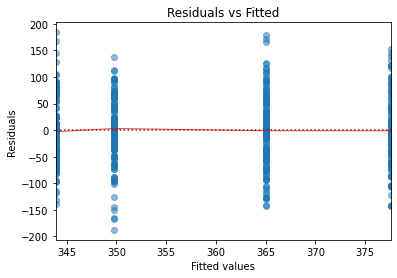

In [63]:
# model values
model_fitted_y = mod.fittedvalues
# model residuals
model_residuals = mod.resid
# normalized residuals
model_norm_residuals = mod.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = mod.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = mod.get_influence().cooks_distance[0]
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'co_emissions', data=aovData,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

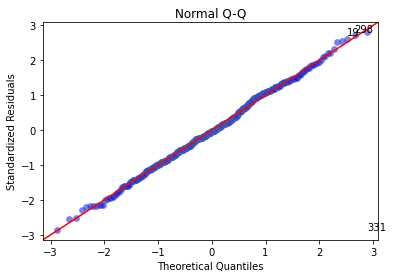

In [64]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
 plot_lm_2.axes[0].annotate(i,xy=(np.flip(QQ.theoretical_quantiles, 0)[r],model_norm_residuals[i]))

In [66]:
### 3.3 Multiple Comparison Test: The Tukey’s HSD and Tukey-Kramer procedure 
### We have observed that Fuel_type and Manufacturer individually have a significant impact on 
### Carbon emission as null hypotheses that group means are equal have been rejected in both 
### cases. However, we have not been able to determine which mean is different from the rest or 
### whether all pairs of means are different. There are special tests (called post hoc tests) of the 
### differences between all pairs of means. These tests are also called multiple comparison tests. 
### These tests are NOT independent t-tests, because here ALL pairs of group means are 
### considered simultaneously. 
### Before we can introduce the multiple comparison tests, we need to discuss about an adjustment 
### to the Type I error of this test.
### Type I error, 𝛼 is the probability of rejecting a null hypothesis when it is true. Hence the
### probability of accepting a null hypothesis when it is true is:
### 1 − 𝛼 = 1-(.05) = 0.95
### Consider now two independent null hypotheses, both are being tested at level 𝛼. Both null 
### hypotheses will be accepted, when both are indeed true is (0.95)*(0.95) = 0.9075, by 
### application of probability multiplication rule. Hence, the probability of making Type I error in 
### this case is 1 – 0.9075 = 0.0975. Note that, even though at individual test level, Type I error 
### had been fixed at 𝛼 = 0.05, in effect, because of two null hypotheses being tested 
### simultaneously, level of the test has increased, i.e. probability of rejecting at least one null 
### hypothesis, when it is actually true is higher than the fixed value. As more and more null 
### hypotheses will be tested simultaneously, Type I error rate will keep on inflating with 
### increasing number of tests as shown in Figure 15. The family-wise error rate is the probability 
### that at least one type I error is made on a set of tests.

In [67]:
### The most important part of multiple comparison test is an adjustment for 𝛼.
### Essentially multiple comparison methods consider each pair of group mean to see whether their 
### difference is significant or not. If a factor has 3 levels (e.g. fuel type), then the number of pairs 
### compared is (
### 3
### 2
### ) = 3; if a factor has 4 levels, (e.g. manufacturer), then the number of pairs 
### compared is (
### 4
### 2
### ) = 6. As levels of a factor increases, the number of pairs increases accordingly
### and we should we worried about inflated family-wise error rate. If ANOVA F-test is rejected, 
### then at least one of the pairs will be found significant.
### There are several tests available for multiple comparisons which are introduced below.
### Tukey’s HSD is recommended when sample sizes are equal, or approximately equal for each 
### level of the factor, i.e. 𝑛𝑗 =
### 𝑛
### 𝑐
### , where c is the number of factor levels. A modification of 
### Tukey’s HSD is suggested by C.Y. Kramer to accommodate unequal group sizes. Another 
### often used procedure is Bonferroni procedure.


In [68]:
### Case Study continued.
### Multiple comparison tests for 𝑋1: Fuel Type
### In order to identify for which fuel type mean carbon emission is different from other groups, 
### the hypotheses may be stated as:
### 𝐻0: All pairs of group means are equal against 𝐻𝑎: At least one group mean is different from 
### the rest.
### In this case, as there are only 3 pairs to be considered, we may write the null and alternative 
### hypothesis as:

In [69]:
### 𝐻0: 𝜇1 = 𝜇2 and 𝜇1 = 𝜇3 and 𝜇2 = 𝜇3 against 𝐻𝑎: 𝜇1 ≠ 𝜇2 or 𝜇1 ≠ 𝜇3 or 𝜇2 ≠ 𝜇3
### respectively, where 𝜇1represents mean carbon emission when fuel type is E85, 𝜇2 represents 
### mean carbon emission when fuel type is LPG and 𝜇3 is the same for Petrol.

In [70]:
# Posthoc test: Tukey test 
MultiComp=MultiComparison(aovData['co_emissions'],aovData['fuel_type'])
print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   E85    LPG  25.6199 0.0012  8.6837  42.556   True
   E85 Petrol  33.5984  0.001 16.8707 50.3262   True
   LPG Petrol   7.9785 0.4931 -8.5144 24.4715  False
----------------------------------------------------


In [72]:
### P-value is significant for comparing carbon emission mean levels for the pair LPG-E85 and 
### Petrol-E85, but not for Petrol-LPG. The null hypothesis of equality of all population means is 
### rejected. It is now clear that mean carbon emission for Petrol and LPG is similar but emission 
### for fuel type E85 is significantly different from these two. 
### Note also that, the numerical values of the differences being positive, mean carbon emission 
### for fuel type E85 is significantly lower than that for petrol or LPG. This same observation is 
### borne out by the residual plot in Fig 10, where the values of the residuals corresponding to E85 
### is lower compared to the other fuel types, which are much closer.
### Often it is easier to visualize the difference among group means.

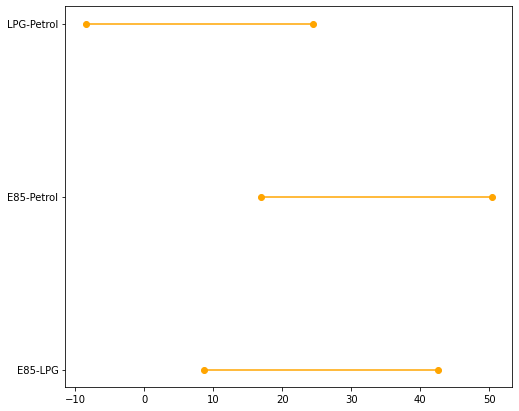

In [73]:
#for family wise comparison
results = MultiComp.tukeyhsd()
df=results.summary()
results_as_html = df.as_html()
df1=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index()
groups = np.array([df1.group1+ '-'+ df1.group2])
plt.figure(figsize=(8,7))
data_dict = {}
data_dict['category'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
 plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']));

In [74]:
### Figure 16 is a graphical representation of pair-wise comparisons from Tukey’s HSD for fuel 
### type. The confidence intervals not containing 0 is for the difference between LPG & E85 and 
### for the difference between Petrol & E85. This indicates that population means of these pairs of 
### fuels are different. From the values of the pairwise differences, it may also be concluded that
### carbon emission from cars using E85 is significantly less than the other two.
### Let us now determine cars by which manufacturer have a mean carbon emission level different 
### from the others.

In [75]:
### Multiple comparison tests for 𝑋2: Manufacturer
### In order to identify for which manufacturer mean carbon emission is different from others, the 
### hypotheses may be stated as:
### 𝐻0: All pairs of group means are equal against 𝐻𝑎: At least one group mean is different from 
### the rest.
### We may also rewrite the null and alternative hypotheses as
### 𝐻0: 𝜇𝑖 = 𝜇𝑗 against 𝐻𝑎: 𝜇𝑖 ≠ 𝜇𝑗
### , for all 𝑖 ≠ 𝑗, 𝑖,𝑗 = 1, 2, 3, 4. Subscript 1 represents Audi, 
### resents mean value of 2 BMW, 3 Ford and 4 Volvo.

In [76]:
## post hoc test
MultiComp=MultiComparison(aovData['co_emissions'],aovData['manufacturer'])
print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  Audi    BMW  27.8115 0.0048   6.4089  49.2141   True
  Audi   Ford  15.3513 0.2178  -5.1756  35.8782  False
  Audi  Volvo   -5.829  0.882 -26.7415  15.0835  False
   BMW   Ford -12.4602 0.4541 -34.2191   9.2987  False
   BMW  Volvo -33.6405  0.001 -55.7635 -11.5175   True
  Ford  Volvo -21.1803 0.0516 -42.4573   0.0967  False
------------------------------------------------------


In [77]:
### It is clear from the above table that there is a significant difference in mean carbon emission 
### between (i) BMW and Audi; between (ii) Volvo and BMW and between (iii) Volvo and Ford.

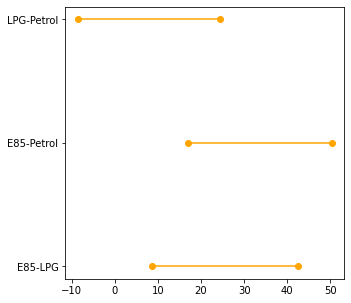

In [80]:
df=results.summary()
results_as_html = df.as_html()
df1=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index()
groups = np.array([df1.group1+ '-'+ df1.group2])
plt.figure(figsize=(10,10))
data_dict = {}
data_dict['category'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
 plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']));